# Redes Neuronales

Construcción de redes neuronales con PyTorch. Pytorch tiene muchas funciones que son muy útiles para construir redes neuronales. Las redes se construyen apilando capas, y esto se puede realizar de manera muy simple.

El módulo torch.nn tiene una gran variedad de capas y funciones de activación que serán de gran utilidad. También se pueden construir capas con operaciones personalizadas, pero escapa a los alcances de este curso.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Un modelo de red neuronal se puede hacer mediante una función o crear objetos de clase con algunos métodos definidos por defecto. Veremos esta última forma, ya que es más versatil

In [2]:
class Modelo(torch.nn.Module):  # Los objetos de esta clase se construyen a partir de la clase Module (herencia)
    def __init__(self, n_in, n_hidden, n_out) -> None:
        super(Modelo, self).__init__() # para heredar los atributos de la clase madre

        self.lineal1 = torch.nn.Linear(n_in, n_hidden) # Capa de entrada
        self.activation1 = torch.nn.ReLU()  # funcion de activacion sobre la 
        self.lineal2 = torch.nn.Linear(n_hidden, n_out) # Capa oculta
    
    def forward(self, x):
        self.x1 = self.lineal1(x)
        self.x2 = self.activation1(self.x1)
        self.x3 = self.lineal2(self.x2)
        return self.x3

In [3]:
modelo = Modelo(5,3,1)
print(modelo)

Modelo(
  (lineal1): Linear(in_features=5, out_features=3, bias=True)
  (activation1): ReLU()
  (lineal2): Linear(in_features=3, out_features=1, bias=True)
)


In [4]:
print('Parametros del modelo:')
print('----------------------')
for par in modelo.parameters():
    print(par)
print('-----------------------')
print('parametros de una capa:')
print('-----------------------')
for par in modelo.lineal1.parameters():
    print(par)

Parametros del modelo:
----------------------
Parameter containing:
tensor([[-0.0129, -0.4125,  0.3651,  0.4168, -0.3105],
        [ 0.4166,  0.3713,  0.2029, -0.3984, -0.2423],
        [-0.2619,  0.0165,  0.1898,  0.3624,  0.2548]], requires_grad=True)
Parameter containing:
tensor([-0.4166, -0.1757, -0.4028], requires_grad=True)
Parameter containing:
tensor([[ 0.3578,  0.5525, -0.3882]], requires_grad=True)
Parameter containing:
tensor([0.1173], requires_grad=True)
-----------------------
parametros de una capa:
-----------------------
Parameter containing:
tensor([[-0.0129, -0.4125,  0.3651,  0.4168, -0.3105],
        [ 0.4166,  0.3713,  0.2029, -0.3984, -0.2423],
        [-0.2619,  0.0165,  0.1898,  0.3624,  0.2548]], requires_grad=True)
Parameter containing:
tensor([-0.4166, -0.1757, -0.4028], requires_grad=True)


In [5]:
inp = torch.rand(5)
modelo.forward(inp)
print('flujo de los tensores')
print('---------------------')
print(f'entrada: {inp}')
print(f'salida de la primera capa lineal: {modelo.x1}')
print(f'salida de la capa de activacion: {modelo.x2}')
print(f'salida de la capa oculta: {modelo.x3}')

flujo de los tensores
---------------------
entrada: tensor([0.3506, 0.3011, 0.4139, 0.1786, 0.6163])
salida de la primera capa lineal: tensor([-0.5111, -0.0544, -0.1892], grad_fn=<ViewBackward0>)
salida de la capa de activacion: tensor([0., 0., 0.], grad_fn=<ReluBackward0>)
salida de la capa oculta: tensor([0.1173], grad_fn=<ViewBackward0>)


## Regresion lineal

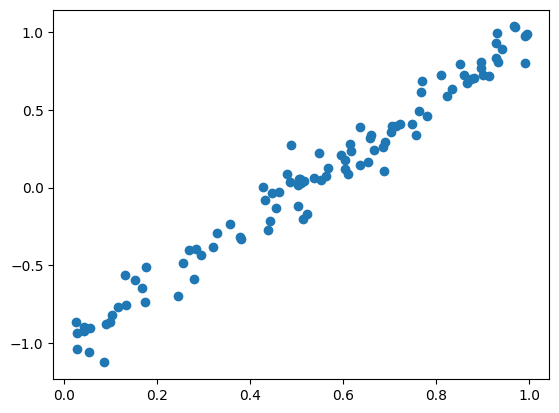

In [6]:
# creamos un dataset sintetico simple
a_true = 2   
b_true = -1
rng = np.random.default_rng()
x = rng.uniform(0,1,100)    # nuestra variable (feature)
y = a_true *x + b_true + rng.normal(0,0.1, 100)   # los valores a ajustar son una recta
plt.scatter(x,y)

In [7]:
class LinReg(torch.nn.Module):
    def __init__(self) -> None:
        super(LinReg, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        return self.linear(x)

regresor = LinReg()
print(f'modelo \n {regresor}')
for p in regresor.parameters():
    print(p)

modelo 
 LinReg(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Parameter containing:
tensor([[0.5906]], requires_grad=True)
Parameter containing:
tensor([0.7748], requires_grad=True)


In [8]:
# para entrenar el modelo necesitamos definir una funcion de perdida 
perdida = torch.nn.MSELoss(reduction='mean') # Usamos la misma que en el tema anterior

In [9]:
# convertimos a tensores los puntos 
x_train = torch.from_numpy(x).float().view(-1,1) # hacemos un vector columna
y_train = torch.from_numpy(y).float().view(-1,1) # hacemos un vector columna

In [10]:
# Entrenamiento
history = {'loss':[], 'parameters': []}
lr = 0.2
for epoch in range(100):  # loop over the dataset multiple times
    y_pred = regresor(x_train)      # Calculo los valores que predice el modelo
    loss = perdida(y_pred, y_train) # calculo el loss para esos valores
    history['loss'].append(loss.item())     # guardo la historia para dibujar
    history['parameters'].append([p.item() for p  in regresor.parameters()])

    # IMPORTANTE!! pongo en cero todos los gradientes del modelo
    regresor.zero_grad()           
    # derivo respecto de los parametros con autograd
    loss.backward()

    # Actualizamos en descenso por gradiente
    with torch.no_grad():
        for p in regresor.parameters():
            p -= lr*p.grad
    if epoch %10 ==0:
        print(f'epoch: {epoch}/100 ---> loss: {loss}')

epoch: 0/100 ---> loss: 1.2213246822357178
epoch: 10/100 ---> loss: 0.1784328818321228
epoch: 20/100 ---> loss: 0.11182279884815216
epoch: 30/100 ---> loss: 0.07150556892156601
epoch: 40/100 ---> loss: 0.047102537006139755
epoch: 50/100 ---> loss: 0.03233201056718826
epoch: 60/100 ---> loss: 0.023391777649521828
epoch: 70/100 ---> loss: 0.017980491742491722
epoch: 80/100 ---> loss: 0.014705165289342403
epoch: 90/100 ---> loss: 0.012722695246338844


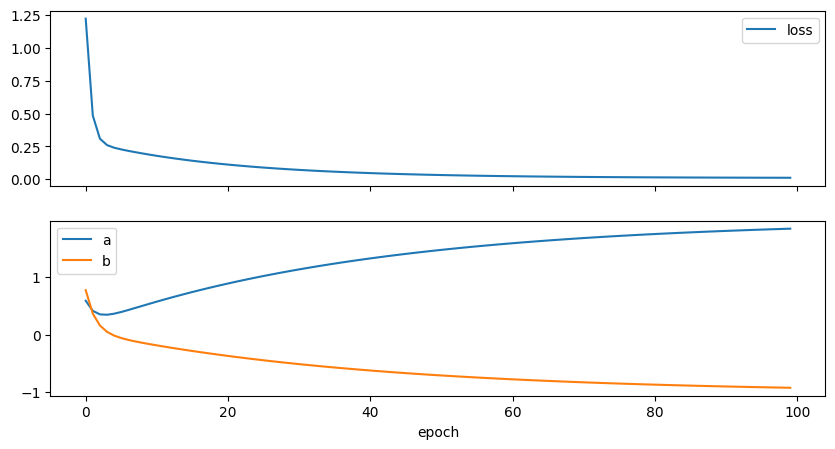

In [11]:
fig, axs = plt.subplots(2,1, figsize = (10,5), sharex= True)
axs[0].plot(history['loss'], label = 'loss')
axs[0].legend()
axs[1].plot([p[0]for p in history['parameters']], label='a')
axs[1].plot([p[1]for p in history['parameters']], label='b')
axs[1].legend()
axs[1].set_xlabel('epoch')
plt.show()

También se pueden utilizar optimizadores incluidos en la librería nn, lo que hace scripts mas compactos

In [12]:
regresor = LinReg() # creamos un modelo nuevo para empezar de cero
criterion = torch.nn.MSELoss(reduction='mean') # Usamos la misma que en el tema anterior
# Tambien hay que definir un optimizador (habiamos usado descenso por gradientes)
optimizer = torch.optim.SGD(regresor.parameters(),lr = 0.2) # vamos a utilizar stochastic gradient descent

In [13]:
# Entrenamiento
history = {'loss':[], 'parameters': []}
for epoch in range(100):  # loop over the dataset multiple times
    y_pred = regresor(x_train)      # Calculo los valores que predice el modelo
    loss = criterion(y_pred, y_train) # calculo el loss para esos valores
    history['loss'].append(loss.item())     # guardo la historia para dibujar
    history['parameters'].append([p.item() for p  in regresor.parameters()])

    optimizer.zero_grad()   # pongo en cero los gradientes usando el método del optimizador      
    
    loss.backward()         # calculo las derivadas (backpropagation)
    
    # Actualizo los parametros
    optimizer.step()

    if epoch %10 ==0:
        print(f'epoch: {epoch}/100 ---> loss: {loss}')

epoch: 0/100 ---> loss: 0.13347850739955902
epoch: 10/100 ---> loss: 0.08291715383529663
epoch: 20/100 ---> loss: 0.05400969088077545
epoch: 30/100 ---> loss: 0.03651272878050804
epoch: 40/100 ---> loss: 0.025922270491719246
epoch: 50/100 ---> loss: 0.019512126222252846
epoch: 60/100 ---> loss: 0.015632234513759613
epoch: 70/100 ---> loss: 0.013283830136060715
epoch: 80/100 ---> loss: 0.011862399987876415
epoch: 90/100 ---> loss: 0.011002039536833763


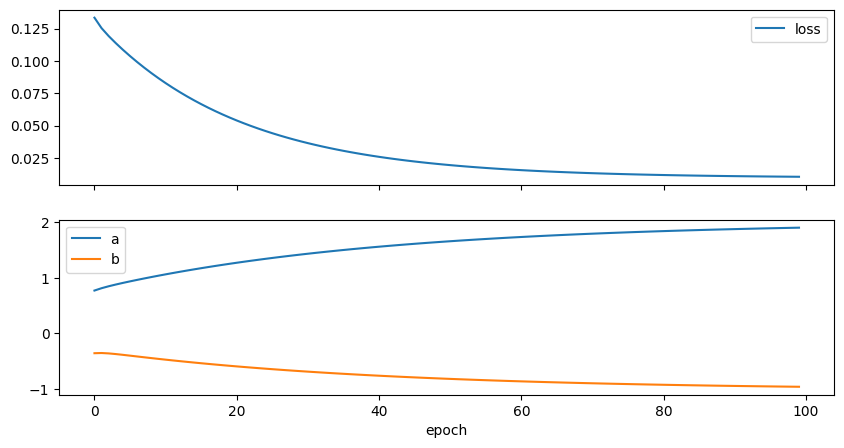

In [14]:
fig, axs = plt.subplots(2,1, figsize = (10,5), sharex= True)
axs[0].plot(history['loss'], label = 'loss')
axs[0].legend()
axs[1].plot([p[0]for p in history['parameters']], label='a')
axs[1].plot([p[1]for p in history['parameters']], label='b')
axs[1].legend()
axs[1].set_xlabel('epoch')
plt.show()

Como se ha utilizado un optimizador SGD al tomar cierta aleatoriedad para evitar minimmos locales la convergencia es más lenta

## Explorando optimizadores
se pueden utilizar diversos optimizadores y funciones de perdida

In [15]:
modelo = LinReg()
criterion= torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelo.parameters(), lr = 0.2)        
history = {'loss':[], 'parameters': []}

for epoch in range(100):  # loop over the dataset multiple times
    y_pred = modelo(x_train)      # Calculo los valores que predice el modelo
    loss = criterion(y_pred, y_train) # calculo el loss para esos valores
    history['loss'].append(loss.item())     # guardo la historia para dibujar
    history['parameters'].append([p.item() for p  in modelo.parameters()])

    optimizer.zero_grad()   # pongo en cero los gradientes usando el método del optimizador      
    
    loss.backward()         # calculo las derivadas (backpropagation)
    
    # Actualizo los parametros
    optimizer.step()

    if epoch %10 ==0:
        print(f'epoch: {epoch}/100 ---> loss: {loss.item()}')

print(f'Adam optimizer:')
print('---------------')
print(modelo.linear.weight.item(), modelo.linear.bias.item())

epoch: 0/100 ---> loss: 0.6479393839836121
epoch: 10/100 ---> loss: 0.12000866234302521
epoch: 20/100 ---> loss: 0.03760363534092903
epoch: 30/100 ---> loss: 0.01766335591673851
epoch: 40/100 ---> loss: 0.01350001897662878
epoch: 50/100 ---> loss: 0.01183469407260418
epoch: 60/100 ---> loss: 0.009896179661154747
epoch: 70/100 ---> loss: 0.009891357272863388
epoch: 80/100 ---> loss: 0.009762203320860863
epoch: 90/100 ---> loss: 0.009701850824058056
Adam optimizer:
---------------
2.0121610164642334 -1.0228217840194702


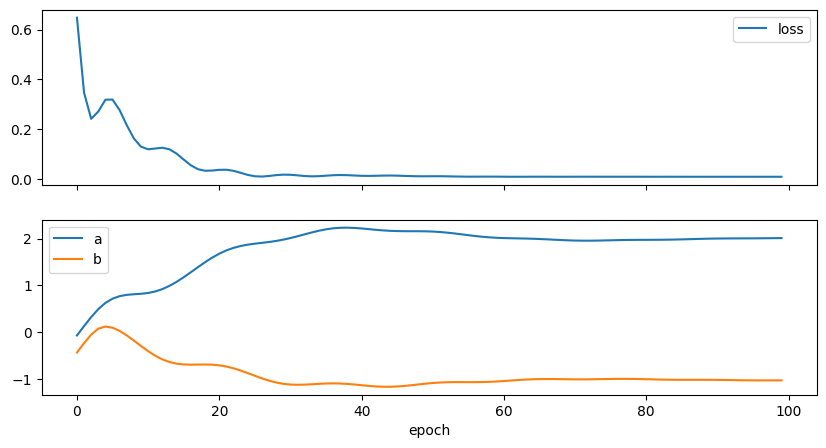

In [16]:
fig, axs = plt.subplots(2,1, figsize = (10,5), sharex= True)
axs[0].plot(history['loss'], label = 'loss')
axs[0].legend()
axs[1].plot([p[0]for p in history['parameters']], label='a')
axs[1].plot([p[1]for p in history['parameters']], label='b')
axs[1].legend()
axs[1].set_xlabel('epoch')
plt.show()